In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
from keras.datasets import mnist
import pandas as pd
import seaborn as sns

ModuleNotFoundError: No module named 'numpy'

In [4]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

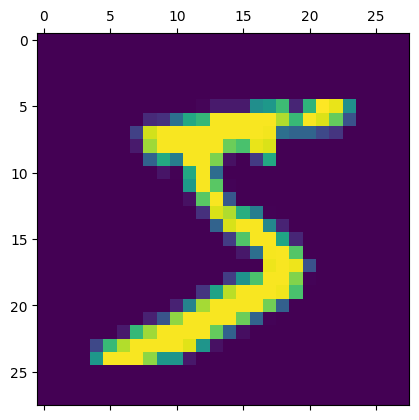

In [5]:
plt.matshow(x_train[0])

In [6]:
image_1 = x_train[0]
label_1 = y_train[0]

image_1_df = pd.DataFrame(image_1)
image_1_df = pd.DataFrame(image_1)


print(f'Label: {label_1}')
print(image_1_df)


Label: 5
    0   1   2   3    4    5    6    7    8    9   ...   18   19   20   21  \
0    0   0   0   0    0    0    0    0    0    0  ...    0    0    0    0   
1    0   0   0   0    0    0    0    0    0    0  ...    0    0    0    0   
2    0   0   0   0    0    0    0    0    0    0  ...    0    0    0    0   
3    0   0   0   0    0    0    0    0    0    0  ...    0    0    0    0   
4    0   0   0   0    0    0    0    0    0    0  ...    0    0    0    0   
5    0   0   0   0    0    0    0    0    0    0  ...  175   26  166  255   
6    0   0   0   0    0    0    0    0   30   36  ...  225  172  253  242   
7    0   0   0   0    0    0    0   49  238  253  ...   93   82   82   56   
8    0   0   0   0    0    0    0   18  219  253  ...    0    0    0    0   
9    0   0   0   0    0    0    0    0   80  156  ...    0    0    0    0   
10   0   0   0   0    0    0    0    0    0   14  ...    0    0    0    0   
11   0   0   0   0    0    0    0    0    0    0  ...    0    0    

In [7]:
# SCALING

In [8]:
x_train = x_train / 255
x_test = x_test / 255

In [9]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [10]:
x_train.shape

(60000, 28, 28)

In [11]:
x_test.shape

(10000, 28, 28)

In [12]:
inputs_train = x_train.shape[0]
inputs_test = x_test.shape[0]
print(inputs_test)

10000


In [13]:
x_train_oneD = x_train.reshape(inputs_train, 28*28)
x_test_oneD = x_test.reshape(inputs_test, 28*28)

In [14]:
x_train_oneD[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [16]:
model = keras.Sequential([
    keras.Input(shape=(784,)),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(500, activation='relu'),
    keras.layers.Dense(250, activation='relu'),
    keras.layers.Dense(10, activation='softmax')

])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train_oneD, y_train, epochs=5)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8964 - loss: 0.3375
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9696 - loss: 0.0960
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9799 - loss: 0.0668
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9846 - loss: 0.0482
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9882 - loss: 0.0391


In [17]:
model.evaluate(x_test_oneD, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 663us/step - accuracy: 0.9697 - loss: 0.0967


[0.08544588088989258, 0.9753000140190125]

In [18]:
y_predicted = model.predict(x_test_oneD)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 670us/step


In [19]:
y_predicted[0]

array([2.20944116e-06, 2.08755431e-04, 2.07429373e-04, 2.92366277e-02,
       8.75303067e-06, 1.10062465e-05, 8.49174953e-08, 9.70128298e-01,
       2.63035927e-05, 1.70657193e-04], dtype=float32)

In [20]:
y_predicted = model.predict(x_test_oneD)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 669us/step


<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 964,    0,    0,    2,    0,    3,    3,    1,    5,    2],
       [   0, 1120,    0,    3,    0,    0,    3,    1,    7,    1],
       [   9,    0, 1001,    8,    2,    0,    2,    2,    7,    1],
       [   0,    0,    2, 1000,    0,    2,    0,    0,    4,    2],
       [   2,    2,    3,    0,  948,    0,    7,    1,    3,   16],
       [   1,    0,    0,    6,    2,  875,    2,    1,    3,    2],
       [   3,    1,    0,    0,    1,    4,  946,    0,    3,    0],
       [   1,    1,    9,   33,    3,    0,    2,  958,   11,   10],
       [   1,    0,    1,    4,    2,    0,    0,    3,  960,    3],
       [   1,    1,    0,   12,    6,    2,    0,    3,    3,  981]],
      dtype=int32)>

In [21]:
# Convert to DataFrame for better visualization
df_cm = pd.DataFrame(cm, 
                     index=[f'True {i}' for i in range(10)], 
                     columns=[f'Pred {i}' for i in range(10)])

# Display the DataFrame (prints as a table)
print(df_cm)

        Pred 0  Pred 1  Pred 2  Pred 3  Pred 4  Pred 5  Pred 6  Pred 7  \
True 0     964       0       0       2       0       3       3       1   
True 1       0    1120       0       3       0       0       3       1   
True 2       9       0    1001       8       2       0       2       2   
True 3       0       0       2    1000       0       2       0       0   
True 4       2       2       3       0     948       0       7       1   
True 5       1       0       0       6       2     875       2       1   
True 6       3       1       0       0       1       4     946       0   
True 7       1       1       9      33       3       0       2     958   
True 8       1       0       1       4       2       0       0       3   
True 9       1       1       0      12       6       2       0       3   

        Pred 8  Pred 9  
True 0       5       2  
True 1       7       1  
True 2       7       1  
True 3       4       2  
True 4       3      16  
True 5       3       2  
True 6    

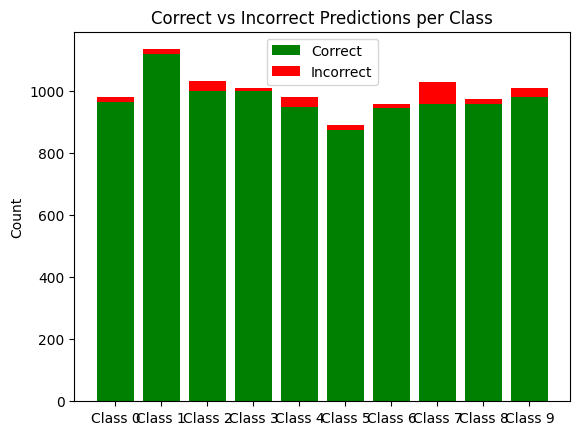

In [22]:
correct = np.diag(cm)
incorrect = np.sum(cm, axis=1) - correct

labels = [f'Class {i}' for i in range(10)]

plt.bar(labels, correct, color='green', label='Correct')
plt.bar(labels, incorrect, bottom=correct, color='red', label='Incorrect')

plt.ylabel('Count')
plt.title('Correct vs Incorrect Predictions per Class')
plt.legend()

plt.show()

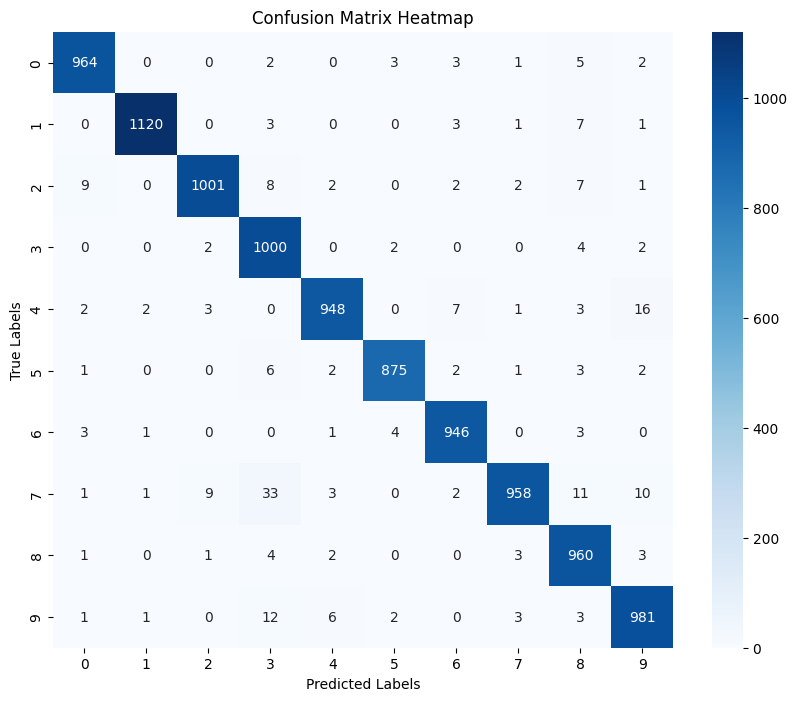

In [27]:
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Set labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')

# Show the plot
plt.show()